<a href="https://colab.research.google.com/github/iamviji/project/blob/master/Report/KerasBinary_In_En_Ch_PSK8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
import time
import tensorflow as tf


from tensorflow.keras.layers import Input, Dense, GaussianNoise
from tensorflow.keras import Model
from keras.layers.normalization import BatchNormalization



NUM_OF_INPUT_MESSAGE = 10* 1000 
NUM_OF_INPUT_MESSAGE_TEST = 2* 1000 
NUM_OF_INPUT_MESSAGE2 = 1000*10
NUM_OF_INPUT_MESSAGE_50 = 100* 1000 
NUM_OF_INPUT_MESSAGE_TEST_50 = 10* 1000 
NUM_OF_INPUT_MESSAGE_100 = 200* 1000 
NUM_OF_INPUT_MESSAGE_TEST_100 = 20* 1000 

SNR_STEP_SIZE = .5

SNR_BEGIN = 0
SNR_END = 10


bler_per_iter_uncoded_commpy_psk_2 = [0.521, 0.473, 0.436, 0.37,  0.304, 0.259, 0.187, 0.138, 0.098, 0.098, 0.052, 0.028, 0.012, 0.011, 0.009, 0.002, 0.0,  0.001, 0.,    0.0]
bler_per_iter_uncoded_itpp_psk_2 = [0.518, 0.478, 0.415, 0.355, 0.305, 0.227, 0.177, 0.149, 0.11,  0.075, 0.055, 0.023, 0.014, 0.014, 0.015, 0.001, 0.003, 0.001, 0.,    0. ]
bler_per_iter_uncoded_commpy_psk_4 = [0.815, 0.793, 0.75,  0.714, 0.64,  0.639, 0.526, 0.49,  0.433, 0.371, 0.335, 0.236, 0.204, 0.154, 0.129, 0.08,  0.063, 0.046, 0.023, 0.018]
bler_per_iter_uncoded_itpp_psk_4 = [0.814, 0.767, 0.729, 0.702, 0.66,  0.616, 0.563, 0.511, 0.442, 0.4,   0.294, 0.277, 0.228, 0.17,  0.114, 0.087, 0.05,  0.037, 0.022, 0.017]
bler_per_iter_ldpc_itpp_psk_4 = [0.584, 0.488, 0.404, 0.332, 0.218, 0.151, 0.097, 0.058, 0.041, 0.024, 0.007, 0.004, 0.002, 0.001, 0.001, 0.,    0.,    0.,    0.,    0.,   ]
bler_per_iter_ham_itpp_psk_4 = [0.51, 0.479, 0.419, 0.333, 0.313, 0.247, 0.212, 0.132, 0.114, 0.093, 0.042, 0.027, 0.024, 0.016, 0.006, 0.005, 0.003, 0.002, 0.,    0.  ]
bler_per_iter_uncoded_itpp_psk_8 = [0.921, 0.917, 0.912, 0.867, 0.86,  0.857, 0.826, 0.808, 0.77,  0.737, 0.704, 0.657, 0.608, 0.6,   0.547, 0.487, 0.426, 0.361, 0.323, 0.293]
bler_per_iter_uncoded_commpy_psk_8 = [0.923, 0.912, 0.891, 0.888, 0.874, 0.851, 0.804, 0.779, 0.758, 0.736, 0.715, 0.643, 0.614, 0.557, 0.542, 0.503, 0.431, 0.386, 0.331, 0.289]

ber_per_iter_uncoded_itpp_psk_2 = [0.07933333, 0.067, 0.058, 0.04811111, 0.039, 0.02911111, 0.02211111, 0.01833333, 0.01266667, 0.00866667, 0.00622222, 0.00255556, 0.00166667, 0.00155556, 0.00166667, 0.00011111, 0.00033333, 0.00011111, 0., 0.]
ber_per_iter_uncoded_commpy_psk_2 = [0.07955556, 0.07055556, 0.05344444, 0.04477778, 0.03644444, 0.02888889, 0.02055556, 0.01955556, 0.01033333, 0.00855556, 0.00522222, 0.004, 0.00188889, 0.00155556, 0.00055556, 0.00066667, 0.00022222, 0.00011111, 0., 0.]
ber_per_iter_uncoded_itpp_psk_4 = [0.1559, 0.1421, 0.1248, 0.1137, 0.1031, 0.0924, 0.0802, 0.0684, 0.055,  0.0499, 0.0348, 0.0336, 0.0257, 0.0185, 0.0121, 0.0092, 0.0054, 0.0037, 0.0022, 0.0017]
ber_per_iter_uncoded_commpy_psk_4 = [0.2137, 0.1943, 0.1773, 0.1624, 0.1473, 0.1355, 0.1105, 0.0984, 0.0873, 0.0686, 0.0573, 0.0454, 0.0356, 0.024,  0.0214, 0.0142, 0.0111, 0.0055, 0.0038, 0.002]
ber_per_iter_uncoded_itpp_psk_8 = [0.24566667, 0.23411111, 0.21455556, 0.19888889, 0.188, 0.184, 0.16355556, 0.15655556, 0.13777778, 0.12966667, 0.115, 0.10622222, 0.09211111, 0.088, 0.07622222, 0.06855556, 0.05677778, 0.04755556, 0.04188889, 0.03577778]
ber_per_iter_uncoded_commpy_psk_8 = [0.32577778, 0.31533333, 0.30455556, 0.29644444, 0.27955556, 0.266, 0.24677778, 0.23411111, 0.22088889, 0.209,      0.19577778, 0.17544444, 0.15844444, 0.13966667, 0.13533333, 0.12077778, 0.10211111, 0.09066667, 0.07544444, 0.06355556]
ber_per_iter_ldpc_itpp_psk_4 = [1.25444444e-01, 1.19111111e-01, 9.48888889e-02, 7.54444444e-02, 5.50000000e-02, 3.86666667e-02, 2.51111111e-02, 1.53333333e-02, 1.04444444e-02, 1.22222222e-03, 2.88888889e-03, 0.00000000e+00, 1.11111111e-04, 3.33333333e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]

bler_per_iter_ldpc_50_100_itpp_psk_4 = [1., 1., 0.997, 0.989, 0.92,  0.697, 0.391, 0.123, 0.042, 0.011, 0.,    0.,  0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]
bler_per_iter_uncoded_100_itpp_psk_4 = [1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    0.997, 0.991, 0.97,  0.948, 0.924, 0.821, 0.74,  0.566, 0.444, 0.296, 0.211, 0.136]
bler_per_iter_uncoded_50_itpp_psk_4 = [1.,    1.,    1.,    1.,    .998,    .986,    .987,    0.974, 0.936, 0.912,  0.859, 0.785, 0.7, 0.602,  0.488, 0.329, 0.255, 0.168, 0.125, 0.061]
bler_per_iter_uncoded_50_itpp_psk_2 = [0.982, 0.964, 0.94,  0.9,   0.861, 0.773, 0.682, 0.565, 0.478, 0.359, 0.248, 0.169, 0.105, 0.074, 0.037, 0.016, 0.011, 0.003, 0.001, 0.   ]
bler_per_iter_uncoded_100_itpp_psk_2 = [0.999, 0.999, 0.995, 0.992, 0.975, 0.939, 0.898, 0.841, 0.72,  0.57,  0.44,  0.312, 0.209, 0.131, 0.071, 0.036, 0.017, 0.013, 0.003, 0.002]

ber_per_iter_ldpc_50_100_itpp_psk_4 = [0.21282, 0.20112, 0.18674, 0.16894, 0.15726, 0.14026, 0.1274, 0.11118, 0.0886,
 0.06074, 0.03002, 0.01486, 0.00372, 0.0003 , 0.     , 0.    , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.    , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.    , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.    , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.    , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.    , 0.     , 0.,
 0.     ] 
ber_per_iter_uncoded_50_itpp_psk_2 = [1.2920e-01, 1.1560e-01, 1.0574e-01, 9.3500e-02, 8.1340e-02, 6.6180e-02,
 5.7260e-02, 4.7700e-02, 3.8560e-02, 2.9580e-02, 2.3500e-02, 1.6280e-02,
 1.2500e-02, 8.5000e-03, 6.5200e-03, 3.8000e-03, 2.3800e-03, 1.2600e-03,
 9.0000e-04, 4.2000e-04, 8.0000e-05, 8.0000e-05, 4.0000e-05, 4.0000e-05,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]
ber_per_iter_uncoded_100_itpp_psk_2 = [1.3108e-01, 1.1509e-01, 1.0292e-01, 9.0680e-02, 7.8550e-02, 6.6490e-02,
 5.5550e-02, 4.6650e-02, 3.7450e-02, 2.9480e-02, 2.2790e-02, 1.8000e-02,
 1.2360e-02, 8.4600e-03, 6.1900e-03, 4.0100e-03, 2.6000e-03, 1.5000e-03,
 7.7000e-04, 4.9000e-04, 2.6000e-04, 5.0000e-05, 5.0000e-05, 2.0000e-05,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]


bler_per_iter_ldpc_100_200_itpp_psk_4 = [1.   , 1., 1., 1., 1., 1., 1., 1., 0.984, 0.8, 0.338, 0.077,
 0.006, 0., 0., 0., 0., 0., 0., 0., 0.   , 0. , 0.   , 0.,
 0.   , 0., 0., 0., 0., 0., 0., 0., 0.   , 0. , 0.   , 0.,
 0.   , 0., 0., 0., 0., 0., 0., 0., 0.   , 0. , 0.   , 0.,
 0.   , 0., 0., 0., 0., 0., 0., 0., 0.   , 0. , 0.   , 0.,
 0.   , 0., 0., 0. ]
 
ber_per_iter_ldpc_100_200_itpp_psk_4 = [0.21407, 0.19966, 0.18519, 0.17217, 0.15746, 0.14123, 0.12889, 0.11378, 0.092,
 0.06216, 0.02413, 0.00589, 0.00051, 0.     , 0.     , 0.     , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.,
 0.     ]


ber_per_iter_ldpc_10_20_itpp_psk_16=[ 0.2874,0.2768,0.2667,0.25,0.2445,0.2303,0.2267,0.2007,0.1981,0.1867,0.1728,0.1616,0.158,0.1396,0.1241,0.1132,0.0885,0.0785,0.0632,0.054 ]
bler_per_iter_ldpc_10_20_itpp_psk_16=[ 0.966,0.957,0.96,0.944,0.963,0.941,0.929,0.897,0.902,0.905,0.869,0.831,0.835,0.78,0.727,0.675,0.542,0.494,0.38,0.31 ]
ber_per_iter_ldpc_50_100_itpp_psk_16=[ 0.30398,0.2909,0.2836,0.27146,0.26126,0.2488,0.23724,0.22752,0.21534,0.20268,0.19294,0.18006,0.16828,0.15982,0.14578,0.13508,0.12444,0.10978,0.09028,0.07288 ]
bler_per_iter_ldpc_50_100_itpp_psk_16=[ 1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999,0.998,0.986,0.888,0.725 ]

import numpy as np #for numerical computing
import matplotlib.pyplot as plt #for plotting functions
from scipy.special import erfc
import math
#ref : https://core.ac.uk/download/pdf/235049678.pdf
EbN0dBs = np.arange(start=0,stop = 10.5, step = .5)
PSK_2_BER_theory = 0.5*erfc(np.sqrt(10**(EbN0dBs/10)))
M=4
#QAM_BER_theory = 2*(1-np.sqrt(1/M))*erfc(np.sqrt(10**(EbN0dBs/10)))
QAM_BER_theory = erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
PSK_4_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
M=8
PSK_8_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
QAM_8_BER_theory = 2*erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
M=16
PSK_16_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
#QAM_16_BER_theory = 2*erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
QAM_16_BER_theory = (3.0/2)*erfc(np.sqrt((4.0/10))*np.sqrt(10**(EbN0dBs/10)))
                     #(3.0/2)*special.erfc(np.sqrt((4.0/10)*10.**(ebno/10)))
M=32
PSK_32_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))


def Snr2Sigma(snr):
  sigma = (10 ** (- snr / 20))  #*(numpy.sqrt(2))
  return sigma


def timer_update(i,current,time_tot,tic_incr=500):
    last = current
    current = time.time()
    t_diff = current-last
    print('SNR: {:04.3f} - Iter: {} - Last {} iterations took {:03.2f}s'.format(snr,i+1,tic_incr,t_diff))
    return time_tot + t_diff



In [ ]:
def GetBerBler (input_message_binary1, input_message_binary2):
  diff = abs(input_message_binary1 - input_message_binary2)
  field_sum = numpy.sum (diff, axis=1)
  field_sum = numpy.reshape (field_sum, (-1,1))
  ber = numpy.sum(field_sum)/(input_message_binary1.shape[0]*input_message_binary1.shape[1])
  field_non_zero_count = numpy.count_nonzero(field_sum != 0, axis=1)
  bler = numpy.sum(field_non_zero_count)/field_non_zero_count.shape[0]
  return ber, bler

def get_ber_bler_of_model (snr_list, encoder, decoder, input_binary, num_of_input_msg, input_message_length, channel_size, verbose=1):
  bler_per_iter_dl_tensor  = numpy.array(())
  ber_per_iter_dl_tensor  = numpy.array(())
  channel_out = []
  encoded_message = encoder.predict(input_binary)
  for snr in snr_list:
    total_bit_error = 0
    total_msg_error = 0    
    sigma = Snr2Sigma (snr)
    noised_message = encoded_message + numpy.random.normal(0, sigma, encoded_message.shape)
    for i in range (num_of_input_msg):
      noised_message[i] = encoded_message[i] + numpy.random.normal(0, sigma, [1,2*channel_size])
      channel_out.append(noised_message[i])
    decoded_message = decoder.predict(noised_message)
    decoded_message = numpy.around(decoded_message).astype(int)
    ber,bler = GetBerBler (input_binary, decoded_message)
    print('SNR: {:04.3f}:-> BLER: {:03.3f} BER: {:03.3f}'.format(snr,bler,ber))
    bler_per_iter_dl_tensor = numpy.append(bler_per_iter_dl_tensor, bler)
    ber_per_iter_dl_tensor = numpy.append(ber_per_iter_dl_tensor, ber)
  return ber_per_iter_dl_tensor, bler_per_iter_dl_tensor, channel_out

def display_points (encoded_message, display_sample, channel_size, width=2, height=2):
  fig, axs = plt.subplots(display_sample,channel_size+1, sharex=True, sharey=True,  figsize=(channel_size*width/2,display_sample*height/2))
  for i in  range (display_sample):
    for j in range (channel_size):
      x = [-1*width,-.5,0,0.5,width]
      y = [-0,0,0,0,0]
      axs[i][j].plot(x, y, '-')
      y = [-1*height,-.5,0,0.5,height]
      x = [0,0,0,0,0]
      axs[i][j].plot(x, y, '-')
      x = []
      y = [ ]
      x.append (encoded_message[i][j*2])
      y.append (encoded_message[i][j*2+1])
      axs[i][j].plot(x, y, 'o')


In [ ]:

from keras import backend as K

input_message_length = 3
encoder_output_length = 3
channel_size = 1

snr_std = -100

def my_loss(y_true, y_pred):
  #tf.reduce_mean (-1 * (y_true*tf.log(y_pred) + (1 - y_true)*tf.log(1 - y_pred) ))
  tf.reduce_mean ((tf.reduce_sum(tf.square(y_true-y_pred), axis=1)))

def custom_loss_function(y_true, y_pred):
   squared_difference = tf.square(y_true - y_pred)
   return tf.reduce_mean(squared_difference, axis=-1)

def _loss_tensor(y_true, y_pred):
    print (y_true)
    #y_true_x = tf.cast(y_true, dtype=tf.float32)
    #y_pred_x = tf.cast(y_pred, dtype=tf.float32)
    #out = -(y_true_x * K.log(y_pred_x) + (1.0 - y_true_x) * K.log(1.0 - y_pred_x))
    out = -(y_true * K.log(y_pred) + (1.0 - y_true) * K.log(1.0 - y_pred))
    return K.mean(out, axis=-1)

input_message_x = Input(shape=(input_message_length,))
# "encoded" is the encoded representation of the input
enc_layer1 = Dense(encoder_output_length, activation='tanh')(input_message_x)
enc_layer11 = Dense(2*channel_size, activation='tanh')(enc_layer1)
enc_layer2 =  enc_layer11 / tf.sqrt(tf.reduce_mean(tf.square(enc_layer11)))
encoder = Model(input_message_x, enc_layer2)

awgn_channel = GaussianNoise(Snr2Sigma(snr_std),input_shape=(2*channel_size,))

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(2*channel_size,))
dec_layer1 = Dense(encoder_output_length, activation='tanh')(encoded_input)
dec_layer2 = Dense(input_message_length, activation='sigmoid')(dec_layer1)
# this model maps an encoded input to its decoder representation
decoder = Model(encoded_input, dec_layer2)

# this model maps an input to its reconstruction
autoencoder = Model(input_message_x, decoder(awgn_channel(encoder(input_message_x))))

#decoder_output = (tf.nn.sigmoid(decoder_input_x))

print("encoder.summary")
print(encoder.summary())
print ("")
print("decoder.summary")
print(decoder.summary())
print ("")
print("autoencoder.summary")
print(autoencoder.summary())
print ("")

encoder.summary
Model: "model_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 3)            12          input_3[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 2)            8           dense_4[0][0]                    
__________________________________________________________________________________________________
tf.math.square_1 (TFOpLambda)   (None, 2)            0           dense_5[0][0]                    
___________________________________________________________________________

In [ ]:
training_input_message = numpy.random.randint(2, size=(NUM_OF_INPUT_MESSAGE,input_message_length))
training_input_message = tf.cast(training_input_message, dtype=tf.float32)
#print (training_input_message)
print (len(training_input_message))
print ('x')
print(input_message_length)

10000
x
3


In [ ]:
test_input_message = numpy.random.randint(2, size=(NUM_OF_INPUT_MESSAGE,input_message_length))
test_input_message = tf.cast(test_input_message, dtype=tf.float32)
test_input_message_label = []
for i in range (test_input_message.shape[0]):
  test_input_message_label.append (test_input_message[i][0])
print (test_input_message)
print (len(test_input_message))

tf.Tensor(
[[1. 0. 1.]
 [1. 1. 1.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 1.]
 [1. 1. 1.]], shape=(10000, 3), dtype=float32)
10000


In [ ]:
import keras

#def custom_losff_fucntion (act, pred):
#  return (tf.reduce_mean(-1*(act * tf.log(pred) + (1-act)*tf.log(1-pred))))

opt = keras.optimizers.Adam(learning_rate=0.001)
autoencoder.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
#autoencoder.compile(optimizer=opt, loss=custom_losff_fucntion)
#loss='mean_squared_error'
#for snr in (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)):
training_history1 = dict ()
for snr in (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)):
  sigma = 1.0*Snr2Sigma (snr)
  snr_std = sigma
  print ("Training for SNR=", snr, " sigma=", sigma) 
  awgn_channel = GaussianNoise(sigma,input_shape=(channel_size,))
  autoencoder = Model(input_message_x, decoder(awgn_channel(encoder(input_message_x))))
  #opt = keras.optimizers.Adam(learning_rate=0.003)
  #autoencoder.compile(optimizer=opt, loss=[tf.keras.losses.sparse_categorical_crossentropy],metrics=['accuracy'])
  autoencoder.compile(optimizer=opt, loss='mse',metrics=['accuracy'])
  history = autoencoder.fit(training_input_message, training_input_message,
                #epochs=50, original
                epochs=40,
                batch_size=500,
                shuffle=False,
                validation_data=(test_input_message, test_input_message))
  training_history1 [snr] = history

Training for SNR= 0.0  sigma= 1.0
Epoch 1/40
20/20 [==============================] - 1s 11ms/step - loss: 0.2429 - accuracy: 0.4129 - val_loss: 0.2184 - val_accuracy: 0.3725
Epoch 2/40
20/20 [==============================] - 0s 4ms/step - loss: 0.2360 - accuracy: 0.4438 - val_loss: 0.2083 - val_accuracy: 0.6215
Epoch 3/40
20/20 [==============================] - 0s 4ms/step - loss: 0.2282 - accuracy: 0.4866 - val_loss: 0.1985 - val_accuracy: 0.7524
Epoch 4/40
20/20 [==============================] - 0s 4ms/step - loss: 0.2218 - accuracy: 0.5121 - val_loss: 0.1900 - val_accuracy: 0.7524
Epoch 5/40
20/20 [==============================] - 0s 4ms/step - loss: 0.2161 - accuracy: 0.5373 - val_loss: 0.1826 - val_accuracy: 0.7524
Epoch 6/40
20/20 [==============================] - 0s 4ms/step - loss: 0.2089 - accuracy: 0.5700 - val_loss: 0.1765 - val_accuracy: 0.7524
Epoch 7/40
20/20 [==============================] - 0s 4ms/step - loss: 0.2027 - accuracy: 0.5905 - val_loss: 0.1712 - val_ac

In [ ]:
snrs_list = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
ber_per_iter_dl_tensor1, bler_per_iter_dl_tensor1, channel_out1 = get_ber_bler_of_model(snrs_list, encoder, decoder, training_input_message, training_input_message.shape[0],input_message_length, channel_size)

SNR: 0.000:-> BLER: 0.557 BER: 0.264
SNR: 0.500:-> BLER: 0.540 BER: 0.250
SNR: 1.000:-> BLER: 0.531 BER: 0.241
SNR: 1.500:-> BLER: 0.498 BER: 0.224
SNR: 2.000:-> BLER: 0.471 BER: 0.207
SNR: 2.500:-> BLER: 0.452 BER: 0.195
SNR: 3.000:-> BLER: 0.420 BER: 0.179
SNR: 3.500:-> BLER: 0.408 BER: 0.173
SNR: 4.000:-> BLER: 0.366 BER: 0.150
SNR: 4.500:-> BLER: 0.345 BER: 0.140
SNR: 5.000:-> BLER: 0.319 BER: 0.126
SNR: 5.500:-> BLER: 0.292 BER: 0.114
SNR: 6.000:-> BLER: 0.260 BER: 0.100
SNR: 6.500:-> BLER: 0.237 BER: 0.089
SNR: 7.000:-> BLER: 0.202 BER: 0.076
SNR: 7.500:-> BLER: 0.179 BER: 0.066
SNR: 8.000:-> BLER: 0.149 BER: 0.054
SNR: 8.500:-> BLER: 0.127 BER: 0.046
SNR: 9.000:-> BLER: 0.115 BER: 0.041
SNR: 9.500:-> BLER: 0.095 BER: 0.033


In [ ]:
test_input_message = numpy.random.randint(2, size=(NUM_OF_INPUT_MESSAGE_TEST,input_message_length))
ber_per_iter_dl_tensor1_1, bler_per_iter_dl_tensor1_1, channel_out1_1 = get_ber_bler_of_model(snrs_list, encoder, decoder, test_input_message, test_input_message.shape[0],input_message_length, channel_size)

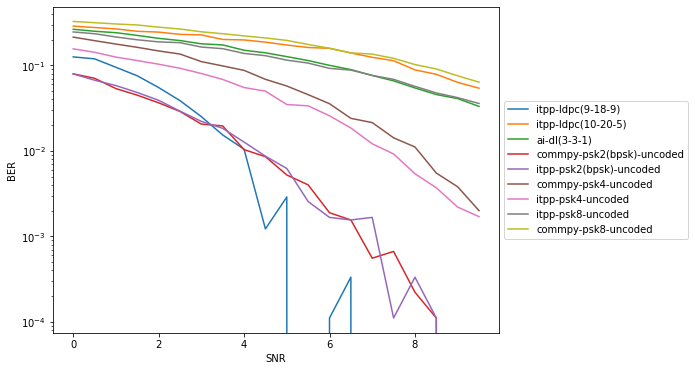

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,ber_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_ldpc_10_20_itpp_psk_16,'', label="itpp-ldpc(10-20-5)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor1,'', label="ai-dl(3-3-1)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor1_1,'', label="ai-dl(3-3-1)(test)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_2_BER_theory[0:20],'', label="psk2-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_4_BER_theory[0:20],'', label="psk4-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_8_BER_theory[0:20],'', label="psk8-theory") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_xlabel('SNR')
#ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

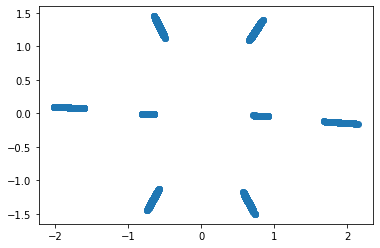

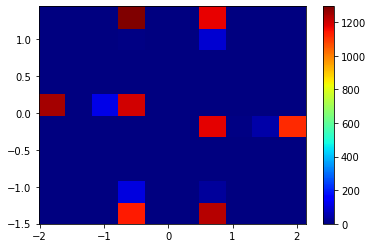

In [ ]:
import matplotlib.pyplot as plt
encoded_message = encoder.predict(training_input_message)
channel_in_array = numpy.transpose(encoded_message)
for i in range (int(channel_size)):
  plt.scatter(channel_in_array[i*2], channel_in_array[i*2+1])
  plt.show()
  plt.hist2d(channel_in_array[i*2], channel_in_array[i*2+1], cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

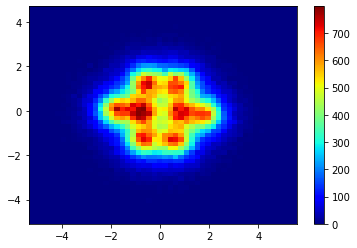

In [ ]:
channel_out_array = numpy.transpose(channel_out1)

for i in range (int(channel_size)):
  plt.hist2d(channel_out_array[2*i], channel_out_array[2*i+1], (50, 50), cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

Text(0, 0.5, 'Loss')

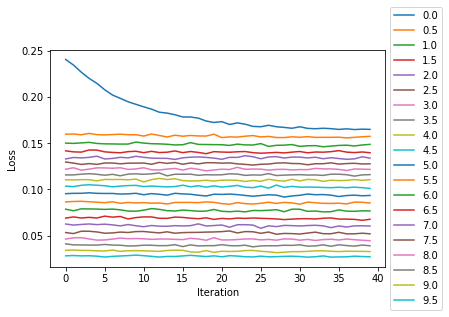

In [ ]:
for snr in (numpy.arange (0, 10, SNR_STEP_SIZE)):
  plt.plot(training_history1[snr].history['loss'], label=snr)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel ("Iteration")
plt.ylabel ("Loss")

1.3600509
1.5150558


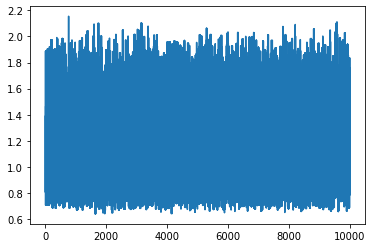

In [ ]:
encoded_message = encoder.predict(training_input_message)
x = numpy.sqrt(numpy.sum (numpy.square(encoded_message), axis=1))
plt.plot(x)
print (numpy.mean(x))
print (numpy.max(x) - numpy.min(x))

In [ ]:

from keras import backend as K

input_message_length = 3
encoder_output_length = 9
channel_size = 1

snr_std = -100

def my_loss(y_true, y_pred):
  #tf.reduce_mean (-1 * (y_true*tf.log(y_pred) + (1 - y_true)*tf.log(1 - y_pred) ))
  tf.reduce_mean ((tf.reduce_sum(tf.square(y_true-y_pred), axis=1)))

def custom_loss_function(y_true, y_pred):
   squared_difference = tf.square(y_true - y_pred)
   return tf.reduce_mean(squared_difference, axis=-1)

def _loss_tensor(y_true, y_pred):
    print (y_true)
    #y_true_x = tf.cast(y_true, dtype=tf.float32)
    #y_pred_x = tf.cast(y_pred, dtype=tf.float32)
    #out = -(y_true_x * K.log(y_pred_x) + (1.0 - y_true_x) * K.log(1.0 - y_pred_x))
    out = -(y_true * K.log(y_pred) + (1.0 - y_true) * K.log(1.0 - y_pred))
    return K.mean(out, axis=-1)

input_message_x = Input(shape=(input_message_length,))
# "encoded" is the encoded representation of the input
enc_layer1 = Dense(encoder_output_length, activation='tanh')(input_message_x)
enc_layer11 = Dense(2*channel_size, activation='tanh')(enc_layer1)
enc_layer2 =  enc_layer11 / tf.sqrt(tf.reduce_mean(tf.square(enc_layer11)))
encoder = Model(input_message_x, enc_layer2)

awgn_channel = GaussianNoise(Snr2Sigma(snr_std),input_shape=(2*channel_size,))

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(2*channel_size,))
dec_layer1 = Dense(encoder_output_length, activation='tanh')(encoded_input)
dec_layer2 = Dense(input_message_length, activation='sigmoid')(dec_layer1)
# this model maps an encoded input to its decoder representation
decoder = Model(encoded_input, dec_layer2)

# this model maps an input to its reconstruction
autoencoder = Model(input_message_x, decoder(awgn_channel(encoder(input_message_x))))

#decoder_output = (tf.nn.sigmoid(decoder_input_x))

print("encoder.summary")
print(encoder.summary())
print ("")
print("decoder.summary")
print(decoder.summary())
print ("")
print("autoencoder.summary")
print(autoencoder.summary())
print ("")

encoder.summary
Model: "model_48"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 9)            36          input_5[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 2)            20          dense_8[0][0]                    
__________________________________________________________________________________________________
tf.math.square_2 (TFOpLambda)   (None, 2)            0           dense_9[0][0]                    
___________________________________________________________________________

In [ ]:
training_input_message = numpy.random.randint(2, size=(NUM_OF_INPUT_MESSAGE,input_message_length))
print (len(training_input_message))
print ('x')
print(input_message_length)

10000
x
3


In [ ]:
test_input_message = numpy.random.randint(2, size=(NUM_OF_INPUT_MESSAGE,input_message_length))


In [ ]:
import keras

#def custom_losff_fucntion (act, pred):
#  return (tf.reduce_mean(-1*(act * tf.log(pred) + (1-act)*tf.log(1-pred))))

opt = keras.optimizers.Adam(learning_rate=0.001)
autoencoder.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
#autoencoder.compile(optimizer=opt, loss=custom_losff_fucntion)
#loss='mean_squared_error'
#for snr in (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)):
training_history2 = dict ()
for snr in (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)):
  sigma = 1.0*Snr2Sigma (snr)
  snr_std = sigma
  print ("Training for SNR=", snr, " sigma=", sigma) 
  awgn_channel = GaussianNoise(sigma,input_shape=(channel_size,))
  autoencoder = Model(input_message_x, decoder(awgn_channel(encoder(input_message_x))))
  #opt = keras.optimizers.Adam(learning_rate=0.003)
  #autoencoder.compile(optimizer=opt, loss=[tf.keras.losses.sparse_categorical_crossentropy],metrics=['accuracy'])
  autoencoder.compile(optimizer=opt, loss='mse',metrics=['accuracy'])
  history = autoencoder.fit(training_input_message, training_input_message,
                #epochs=50, original
                epochs=40,
                batch_size=500,
                shuffle=False,
                validation_data=(test_input_message, test_input_message))
  training_history2 [snr] = history

Training for SNR= 0.0  sigma= 1.0
Epoch 1/40
20/20 [==============================] - 1s 10ms/step - loss: 0.2466 - accuracy: 0.4738 - val_loss: 0.2371 - val_accuracy: 0.6338
Epoch 2/40
20/20 [==============================] - 0s 15ms/step - loss: 0.2420 - accuracy: 0.4556 - val_loss: 0.2293 - val_accuracy: 0.5024
Epoch 3/40
20/20 [==============================] - 0s 4ms/step - loss: 0.2357 - accuracy: 0.4594 - val_loss: 0.2181 - val_accuracy: 0.6220
Epoch 4/40
20/20 [==============================] - 0s 4ms/step - loss: 0.2281 - accuracy: 0.4940 - val_loss: 0.2034 - val_accuracy: 0.6220
Epoch 5/40
20/20 [==============================] - 0s 4ms/step - loss: 0.2192 - accuracy: 0.5074 - val_loss: 0.1856 - val_accuracy: 0.7482
Epoch 6/40
20/20 [==============================] - 0s 4ms/step - loss: 0.2045 - accuracy: 0.5608 - val_loss: 0.1675 - val_accuracy: 0.7482
Epoch 7/40
20/20 [==============================] - 0s 4ms/step - loss: 0.1913 - accuracy: 0.5991 - val_loss: 0.1566 - val_a

In [ ]:
snrs_list = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
ber_per_iter_dl_tensor2, bler_per_iter_dl_tensor2, channel_out2 = get_ber_bler_of_model(snrs_list, encoder, decoder, training_input_message, training_input_message.shape[0],input_message_length, channel_size)

SNR: 0.000:-> BLER: 0.570 BER: 0.243
SNR: 0.500:-> BLER: 0.558 BER: 0.234
SNR: 1.000:-> BLER: 0.527 BER: 0.216
SNR: 1.500:-> BLER: 0.516 BER: 0.209
SNR: 2.000:-> BLER: 0.482 BER: 0.191
SNR: 2.500:-> BLER: 0.462 BER: 0.179
SNR: 3.000:-> BLER: 0.430 BER: 0.165
SNR: 3.500:-> BLER: 0.412 BER: 0.154
SNR: 4.000:-> BLER: 0.385 BER: 0.143
SNR: 4.500:-> BLER: 0.354 BER: 0.128
SNR: 5.000:-> BLER: 0.333 BER: 0.120
SNR: 5.500:-> BLER: 0.301 BER: 0.107
SNR: 6.000:-> BLER: 0.266 BER: 0.094
SNR: 6.500:-> BLER: 0.239 BER: 0.083
SNR: 7.000:-> BLER: 0.207 BER: 0.072
SNR: 7.500:-> BLER: 0.190 BER: 0.065
SNR: 8.000:-> BLER: 0.160 BER: 0.055
SNR: 8.500:-> BLER: 0.142 BER: 0.048
SNR: 9.000:-> BLER: 0.120 BER: 0.041
SNR: 9.500:-> BLER: 0.095 BER: 0.032


In [ ]:
test_input_message = numpy.random.randint(2, size=(NUM_OF_INPUT_MESSAGE,input_message_length))
ber_per_iter_dl_tensor3, bler_per_iter_dl_tensor3, channel_out3 = get_ber_bler_of_model(snrs_list, encoder, decoder, test_input_message, test_input_message.shape[0],input_message_length, channel_size)

SNR: 0.000:-> BLER: 0.572 BER: 0.239
SNR: 0.500:-> BLER: 0.558 BER: 0.232
SNR: 1.000:-> BLER: 0.524 BER: 0.216
SNR: 1.500:-> BLER: 0.510 BER: 0.203
SNR: 2.000:-> BLER: 0.481 BER: 0.189
SNR: 2.500:-> BLER: 0.465 BER: 0.181
SNR: 3.000:-> BLER: 0.435 BER: 0.167
SNR: 3.500:-> BLER: 0.404 BER: 0.152
SNR: 4.000:-> BLER: 0.387 BER: 0.143
SNR: 4.500:-> BLER: 0.344 BER: 0.125
SNR: 5.000:-> BLER: 0.328 BER: 0.118
SNR: 5.500:-> BLER: 0.297 BER: 0.106
SNR: 6.000:-> BLER: 0.268 BER: 0.096
SNR: 6.500:-> BLER: 0.244 BER: 0.085
SNR: 7.000:-> BLER: 0.217 BER: 0.075
SNR: 7.500:-> BLER: 0.190 BER: 0.066
SNR: 8.000:-> BLER: 0.161 BER: 0.055
SNR: 8.500:-> BLER: 0.139 BER: 0.047
SNR: 9.000:-> BLER: 0.121 BER: 0.041
SNR: 9.500:-> BLER: 0.101 BER: 0.034


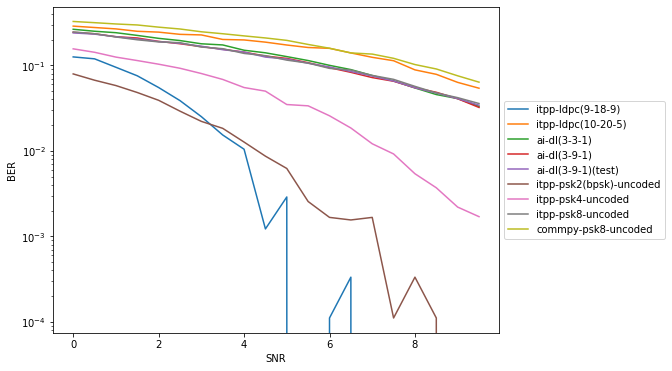

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,ber_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_ldpc_10_20_itpp_psk_16,'', label="itpp-ldpc(10-20-5)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor1,'', label="ai-dl(3-3-1)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor2,'', label="ai-dl(3-9-1)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor3,'', label="ai-dl(3-9-1)(test)") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_2_BER_theory[0:20],'', label="psk2-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_4_BER_theory[0:20],'', label="psk4-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_8_BER_theory[0:20],'', label="psk8-theory") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_xlabel('SNR')
#ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

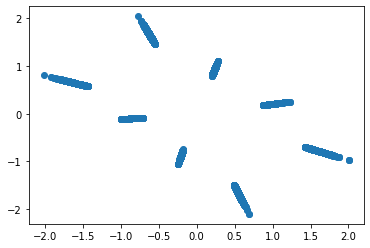

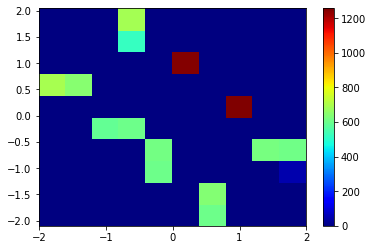

In [ ]:
import matplotlib.pyplot as plt
encoded_message = encoder.predict(training_input_message)
channel_in_array = numpy.transpose(encoded_message)
for i in range (int(channel_size)):
  plt.scatter(channel_in_array[i*2], channel_in_array[i*2+1])
  plt.show()
  plt.hist2d(channel_in_array[i*2], channel_in_array[i*2+1], cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

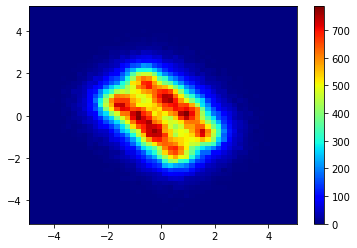

In [ ]:
channel_out_array = numpy.transpose(channel_out2)

for i in range (int(channel_size)):
  plt.hist2d(channel_out_array[2*i], channel_out_array[2*i+1], (50, 50), cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]


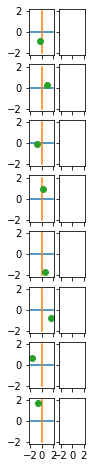

In [ ]:
bin = [0,1]
bin = numpy.array([ (x,y,z) for x in bin for y in bin for z in bin ])
print (bin)
encoded_message = encoder.predict(bin) 
#print (training_input_message[0:5])
display_points (encoded_message, 8, channel_size)


Text(0, 0.5, 'Loss')

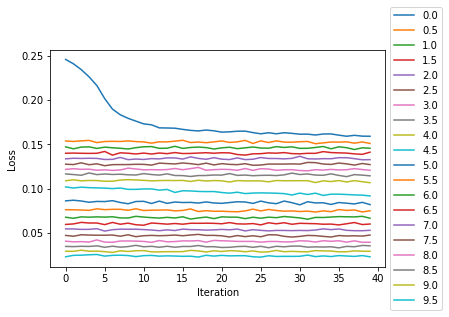

In [ ]:
for snr in (numpy.arange (0, 10, SNR_STEP_SIZE)):
  plt.plot(training_history2[snr].history['loss'], label=snr)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel ("Iteration")
plt.ylabel ("Loss")

In [ ]:
from keras import backend as K

input_message_length = 12
encoder_output_length = 36
channel_size = 4

snr_std = -100

def my_loss(y_true, y_pred):
  #tf.reduce_mean (-1 * (y_true*tf.log(y_pred) + (1 - y_true)*tf.log(1 - y_pred) ))
  tf.reduce_mean ((tf.reduce_sum(tf.square(y_true-y_pred), axis=1)))

def custom_loss_function(y_true, y_pred):
   squared_difference = tf.square(y_true - y_pred)
   return tf.reduce_mean(squared_difference, axis=-1)

def _loss_tensor(y_true, y_pred):
    print (y_true)
    #y_true_x = tf.cast(y_true, dtype=tf.float32)
    #y_pred_x = tf.cast(y_pred, dtype=tf.float32)
    #out = -(y_true_x * K.log(y_pred_x) + (1.0 - y_true_x) * K.log(1.0 - y_pred_x))
    out = -(y_true * K.log(y_pred) + (1.0 - y_true) * K.log(1.0 - y_pred))
    return K.mean(out, axis=-1)

input_message_x = Input(shape=(input_message_length,))
# "encoded" is the encoded representation of the input
enc_layer1 = Dense(encoder_output_length, activation='tanh')(input_message_x)
enc_layer11 = Dense(2*channel_size, activation='tanh')(enc_layer1)
enc_layer2 =  enc_layer11 / tf.sqrt(tf.reduce_mean(tf.square(enc_layer11)))
encoder = Model(input_message_x, enc_layer2)

awgn_channel = GaussianNoise(Snr2Sigma(snr_std),input_shape=(2*channel_size,))

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(2*channel_size,))
dec_layer1 = Dense(encoder_output_length, activation='tanh')(encoded_input)
dec_layer2 = Dense(input_message_length, activation='sigmoid')(dec_layer1)
# this model maps an encoded input to its decoder representation
decoder = Model(encoded_input, dec_layer2)

# this model maps an input to its reconstruction
autoencoder = Model(input_message_x, decoder(awgn_channel(encoder(input_message_x))))

#decoder_output = (tf.nn.sigmoid(decoder_input_x))

print("encoder.summary")
print(encoder.summary())
print ("")
print("decoder.summary")
print(decoder.summary())
print ("")
print("autoencoder.summary")
print(autoencoder.summary())
print ("")

encoder.summary
Model: "model_77"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 12)]         0                                            
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 36)           468         input_11[0][0]                   
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 8)            296         dense_20[0][0]                   
__________________________________________________________________________________________________
tf.math.square_5 (TFOpLambda)   (None, 8)            0           dense_21[0][0]                   
___________________________________________________________________________

In [ ]:

training_input_message = numpy.random.randint(2, size=(NUM_OF_INPUT_MESSAGE,input_message_length))
training_input_message = tf.cast(training_input_message, dtype=tf.float32)
#print (training_input_message)
print (len(training_input_message))
print ('x')
print(input_message_length)

10000
x
12


In [ ]:

test_input_message = numpy.random.randint(2, size=(NUM_OF_INPUT_MESSAGE,input_message_length))
test_input_message = tf.cast(test_input_message, dtype=tf.float32)
test_input_message_label = []
for i in range (test_input_message.shape[0]):
  test_input_message_label.append (test_input_message[i][0])
print (test_input_message)
print (len(test_input_message))

tf.Tensor(
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 1. 1. 0.]
 ...
 [1. 0. 1. ... 0. 1. 1.]
 [0. 1. 0. ... 1. 0. 1.]
 [1. 1. 0. ... 1. 1. 0.]], shape=(10000, 12), dtype=float32)
10000


In [ ]:
import keras

#def custom_losff_fucntion (act, pred):
#  return (tf.reduce_mean(-1*(act * tf.log(pred) + (1-act)*tf.log(1-pred))))

opt = keras.optimizers.Adam(learning_rate=0.001)
autoencoder.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
#autoencoder.compile(optimizer=opt, loss=custom_losff_fucntion)
#loss='mean_squared_error'
#for snr in (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)):
training_history3 = dict ()
for snr in (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)):
  sigma = 1.0*Snr2Sigma (snr)
  snr_std = sigma
  print ("Training for SNR=", snr, " sigma=", sigma) 
  awgn_channel = GaussianNoise(sigma,input_shape=(channel_size,))
  autoencoder = Model(input_message_x, decoder(awgn_channel(encoder(input_message_x))))
  #opt = keras.optimizers.Adam(learning_rate=0.003)
  #autoencoder.compile(optimizer=opt, loss=[tf.keras.losses.sparse_categorical_crossentropy],metrics=['accuracy'])
  autoencoder.compile(optimizer=opt, loss='mse',metrics=['accuracy'])
  history = autoencoder.fit(training_input_message, training_input_message,
                #epochs=50, original
                epochs=40,
                batch_size=500,
                shuffle=False,
                validation_data=(test_input_message, test_input_message))
  training_history3 [snr] = history

Training for SNR= 0.0  sigma= 1.0
Epoch 1/40
20/20 [==============================] - 1s 11ms/step - loss: 0.2723 - accuracy: 0.0351 - val_loss: 0.2354 - val_accuracy: 0.0333
Epoch 2/40
20/20 [==============================] - 0s 5ms/step - loss: 0.2393 - accuracy: 0.0978 - val_loss: 0.1996 - val_accuracy: 0.2238
Epoch 3/40
20/20 [==============================] - 0s 5ms/step - loss: 0.2108 - accuracy: 0.2203 - val_loss: 0.1774 - val_accuracy: 0.3300
Epoch 4/40
20/20 [==============================] - 0s 4ms/step - loss: 0.1966 - accuracy: 0.2501 - val_loss: 0.1620 - val_accuracy: 0.2912
Epoch 5/40
20/20 [==============================] - 0s 5ms/step - loss: 0.1872 - accuracy: 0.2416 - val_loss: 0.1489 - val_accuracy: 0.2796
Epoch 6/40
20/20 [==============================] - 0s 4ms/step - loss: 0.1801 - accuracy: 0.2300 - val_loss: 0.1381 - val_accuracy: 0.2635
Epoch 7/40
20/20 [==============================] - 0s 5ms/step - loss: 0.1759 - accuracy: 0.2102 - val_loss: 0.1299 - val_ac

In [ ]:
snrs_list = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
ber_per_iter_dl_tensor4, bler_per_iter_dl_tensor4, channel_out4 = get_ber_bler_of_model(snrs_list, encoder, decoder, training_input_message, training_input_message.shape[0],input_message_length, channel_size)

SNR: 0.000:-> BLER: 0.962 BER: 0.255
SNR: 0.500:-> BLER: 0.958 BER: 0.245
SNR: 1.000:-> BLER: 0.947 BER: 0.233
SNR: 1.500:-> BLER: 0.936 BER: 0.222
SNR: 2.000:-> BLER: 0.925 BER: 0.211
SNR: 2.500:-> BLER: 0.913 BER: 0.198
SNR: 3.000:-> BLER: 0.892 BER: 0.188
SNR: 3.500:-> BLER: 0.867 BER: 0.173
SNR: 4.000:-> BLER: 0.843 BER: 0.164
SNR: 4.500:-> BLER: 0.823 BER: 0.152
SNR: 5.000:-> BLER: 0.793 BER: 0.139
SNR: 5.500:-> BLER: 0.756 BER: 0.128
SNR: 6.000:-> BLER: 0.712 BER: 0.113
SNR: 6.500:-> BLER: 0.669 BER: 0.103
SNR: 7.000:-> BLER: 0.613 BER: 0.088
SNR: 7.500:-> BLER: 0.556 BER: 0.078
SNR: 8.000:-> BLER: 0.515 BER: 0.068
SNR: 8.500:-> BLER: 0.458 BER: 0.058
SNR: 9.000:-> BLER: 0.404 BER: 0.049
SNR: 9.500:-> BLER: 0.341 BER: 0.040


In [ ]:
test_input_message = numpy.random.randint(2, size=(NUM_OF_INPUT_MESSAGE,input_message_length))
ber_per_iter_dl_tensor5, bler_per_iter_dl_tensor5, channel_out5 = get_ber_bler_of_model(snrs_list, encoder, decoder, test_input_message, test_input_message.shape[0],input_message_length, channel_size)

SNR: 0.000:-> BLER: 0.962 BER: 0.256
SNR: 0.500:-> BLER: 0.960 BER: 0.247
SNR: 1.000:-> BLER: 0.946 BER: 0.236
SNR: 1.500:-> BLER: 0.938 BER: 0.223
SNR: 2.000:-> BLER: 0.928 BER: 0.213
SNR: 2.500:-> BLER: 0.910 BER: 0.201
SNR: 3.000:-> BLER: 0.890 BER: 0.188
SNR: 3.500:-> BLER: 0.876 BER: 0.177
SNR: 4.000:-> BLER: 0.849 BER: 0.165
SNR: 4.500:-> BLER: 0.824 BER: 0.153
SNR: 5.000:-> BLER: 0.787 BER: 0.139
SNR: 5.500:-> BLER: 0.757 BER: 0.127
SNR: 6.000:-> BLER: 0.704 BER: 0.113
SNR: 6.500:-> BLER: 0.673 BER: 0.102
SNR: 7.000:-> BLER: 0.625 BER: 0.092
SNR: 7.500:-> BLER: 0.564 BER: 0.079
SNR: 8.000:-> BLER: 0.515 BER: 0.069
SNR: 8.500:-> BLER: 0.460 BER: 0.057
SNR: 9.000:-> BLER: 0.406 BER: 0.050
SNR: 9.500:-> BLER: 0.344 BER: 0.040


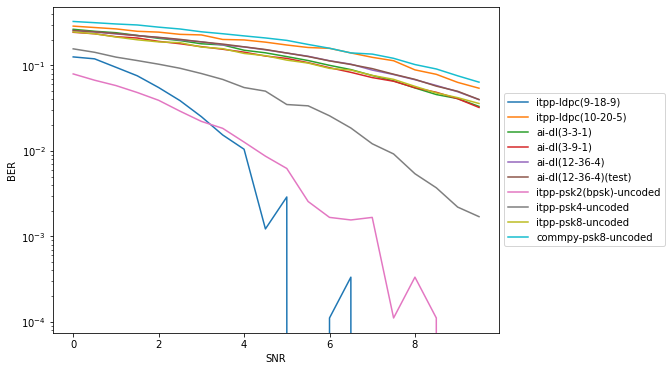

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,ber_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_ldpc_10_20_itpp_psk_16,'', label="itpp-ldpc(10-20-5)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor1,'', label="ai-dl(3-3-1)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor2,'', label="ai-dl(3-9-1)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor4,'', label="ai-dl(12-36-4)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor5,'', label="ai-dl(12-36-4)(test)") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_2_BER_theory[0:20],'', label="psk2-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_4_BER_theory[0:20],'', label="psk4-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_8_BER_theory[0:20],'', label="psk8-theory") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_xlabel('SNR')
#ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

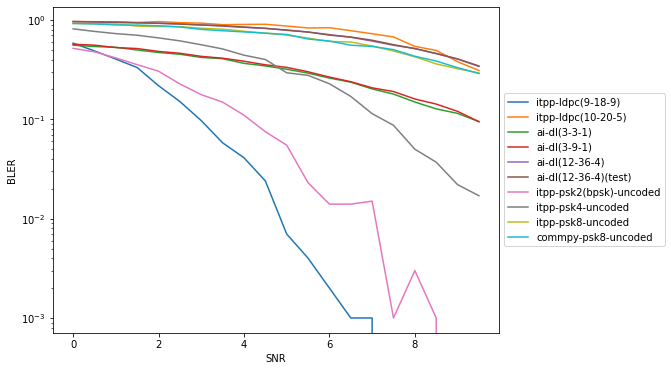

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,bler_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_ldpc_10_20_itpp_psk_16,'', label="itpp-ldpc(10-20-5)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor1,'', label="ai-dl(3-3-1)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor2,'', label="ai-dl(3-9-1)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor4,'', label="ai-dl(12-36-4)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor5,'', label="ai-dl(12-36-4)(test)") # plot BER vs SNR
#ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,bler_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_2_BER_theory[0:20],'', label="psk2-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_4_BER_theory[0:20],'', label="psk4-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_8_BER_theory[0:20],'', label="psk8-theory") # plot BER vs SNR
ax1.set_ylabel('BLER')
ax1.set_xlabel('SNR')
#ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

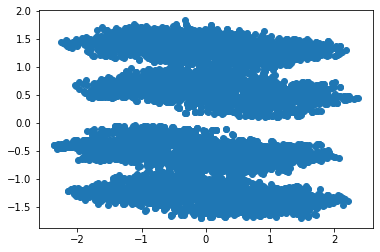

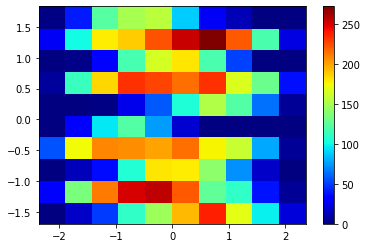

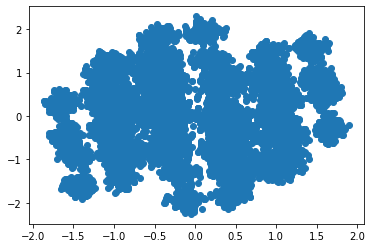

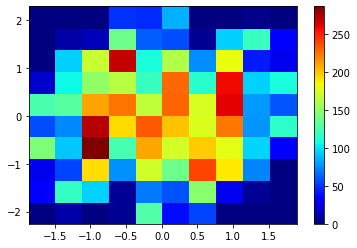

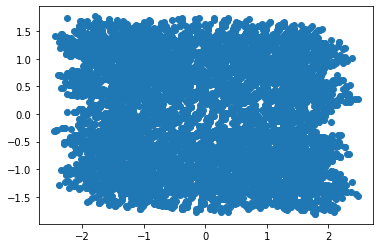

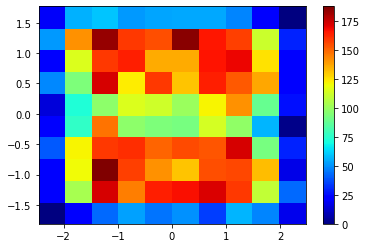

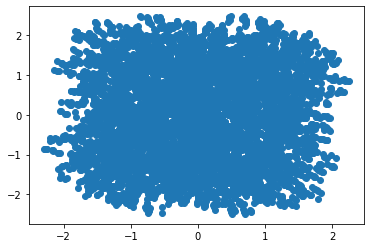

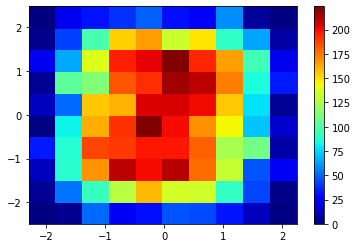

In [ ]:

import matplotlib.pyplot as plt
encoded_message = encoder.predict(training_input_message)
channel_in_array = numpy.transpose(encoded_message)
for i in range (int(channel_size)):
  plt.scatter(channel_in_array[i*2], channel_in_array[i*2+1])
  plt.show()
  plt.hist2d(channel_in_array[i*2], channel_in_array[i*2+1], cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

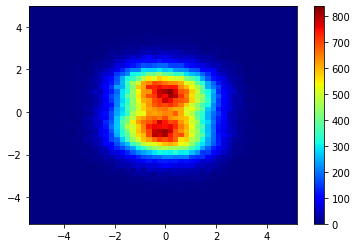

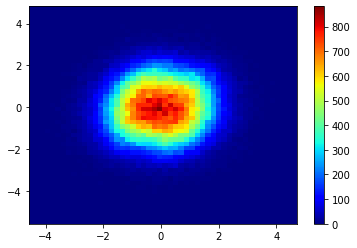

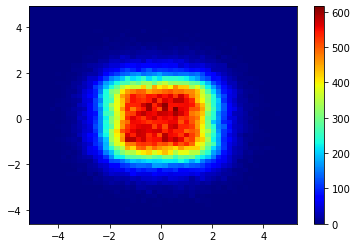

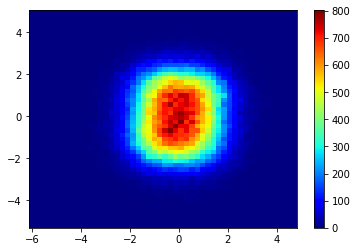

In [ ]:
channel_out_array = numpy.transpose(channel_out4)

for i in range (int(channel_size)):
  plt.hist2d(channel_out_array[2*i], channel_out_array[2*i+1], (50, 50), cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

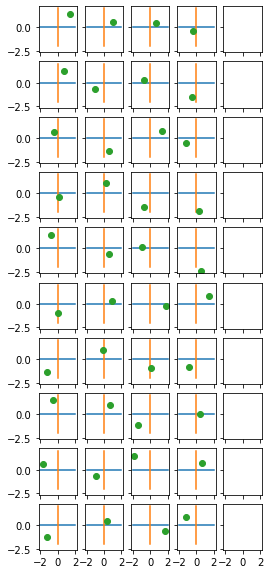

In [ ]:
display_points (encoded_message, 10, channel_size)


In [ ]:

from keras import backend as K

input_message_length = 51
encoder_output_length = 153
channel_size = 17

snr_std = -100

def my_loss(y_true, y_pred):
  #tf.reduce_mean (-1 * (y_true*tf.log(y_pred) + (1 - y_true)*tf.log(1 - y_pred) ))
  tf.reduce_mean ((tf.reduce_sum(tf.square(y_true-y_pred), axis=1)))

def custom_loss_function(y_true, y_pred):
   squared_difference = tf.square(y_true - y_pred)
   return tf.reduce_mean(squared_difference, axis=-1)

def _loss_tensor(y_true, y_pred):
    print (y_true)
    #y_true_x = tf.cast(y_true, dtype=tf.float32)
    #y_pred_x = tf.cast(y_pred, dtype=tf.float32)
    #out = -(y_true_x * K.log(y_pred_x) + (1.0 - y_true_x) * K.log(1.0 - y_pred_x))
    out = -(y_true * K.log(y_pred) + (1.0 - y_true) * K.log(1.0 - y_pred))
    return K.mean(out, axis=-1)

input_message_x = Input(shape=(input_message_length,))
# "encoded" is the encoded representation of the input
enc_layer1 = Dense(encoder_output_length, activation='tanh')(input_message_x)
enc_layer11 = Dense(2*channel_size, activation='tanh')(enc_layer1)
enc_layer2 =  enc_layer11 / tf.sqrt(tf.reduce_mean(tf.square(enc_layer11)))
encoder = Model(input_message_x, enc_layer2)

awgn_channel = GaussianNoise(Snr2Sigma(snr_std),input_shape=(2*channel_size,))

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(2*channel_size,))
dec_layer1 = Dense(encoder_output_length, activation='tanh')(encoded_input)
dec_layer2 = Dense(input_message_length, activation='sigmoid')(dec_layer1)
# this model maps an encoded input to its decoder representation
decoder = Model(encoded_input, dec_layer2)

# this model maps an input to its reconstruction
autoencoder = Model(input_message_x, decoder(awgn_channel(encoder(input_message_x))))

#decoder_output = (tf.nn.sigmoid(decoder_input_x))

print("encoder.summary")
print(encoder.summary())
print ("")
print("decoder.summary")
print(decoder.summary())
print ("")
print("autoencoder.summary")
print(autoencoder.summary())
print ("")

encoder.summary
Model: "model_100"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 51)]         0                                            
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 153)          7956        input_13[0][0]                   
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 34)           5236        dense_24[0][0]                   
__________________________________________________________________________________________________
tf.math.square_6 (TFOpLambda)   (None, 34)           0           dense_25[0][0]                   
__________________________________________________________________________

In [ ]:
training_input_message = numpy.random.randint(2, size=(NUM_OF_INPUT_MESSAGE_50,input_message_length))
test_input_message = numpy.random.randint(2, size=(NUM_OF_INPUT_MESSAGE_50,input_message_length))


In [ ]:

#def custom_losff_fucntion (act, pred):
#  return (tf.reduce_mean(-1*(act * tf.log(pred) + (1-act)*tf.log(1-pred))))

opt = keras.optimizers.Adam(learning_rate=0.001)
autoencoder.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
#autoencoder.compile(optimizer=opt, loss=custom_losff_fucntion)
#loss='mean_squared_error'
#for snr in (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)):
training_history5 = dict ()
for snr in (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)):
  sigma = 1.0*Snr2Sigma (snr)
  snr_std = sigma
  print ("Training for SNR=", snr, " sigma=", sigma) 
  awgn_channel = GaussianNoise(sigma,input_shape=(channel_size,))
  autoencoder = Model(input_message_x, decoder(awgn_channel(encoder(input_message_x))))
  #opt = keras.optimizers.Adam(learning_rate=0.003)
  #autoencoder.compile(optimizer=opt, loss=[tf.keras.losses.sparse_categorical_crossentropy],metrics=['accuracy'])
  autoencoder.compile(optimizer=opt, loss='mse',metrics=['accuracy'])
  history = autoencoder.fit(training_input_message, training_input_message,
                #epochs=50, original
                epochs=40,
                batch_size=1000,
                shuffle=False,
                validation_data=(test_input_message, test_input_message))
  training_history5 [snr] = history

Training for SNR= 0.0  sigma= 1.0
Epoch 1/40
100/100 [==============================] - 2s 14ms/step - loss: 0.2230 - accuracy: 0.0228 - val_loss: 0.1233 - val_accuracy: 0.0426
Epoch 2/40
100/100 [==============================] - 1s 13ms/step - loss: 0.1692 - accuracy: 0.0396 - val_loss: 0.1021 - val_accuracy: 0.0393
Epoch 3/40
100/100 [==============================] - 1s 13ms/step - loss: 0.1656 - accuracy: 0.0382 - val_loss: 0.0978 - val_accuracy: 0.0365
Epoch 4/40
100/100 [==============================] - 2s 17ms/step - loss: 0.1650 - accuracy: 0.0358 - val_loss: 0.0966 - val_accuracy: 0.0366
Epoch 5/40
100/100 [==============================] - 1s 13ms/step - loss: 0.1647 - accuracy: 0.0369 - val_loss: 0.0963 - val_accuracy: 0.0394
Epoch 6/40
100/100 [==============================] - 1s 13ms/step - loss: 0.1641 - accuracy: 0.0354 - val_loss: 0.0962 - val_accuracy: 0.0385
Epoch 7/40
100/100 [==============================] - 1s 13ms/step - loss: 0.1639 - accuracy: 0.0363 - val_l

In [ ]:
snrs_list = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
ber_per_iter_dl_tensor6, bler_per_iter_dl_tensor6, channel_out6 = get_ber_bler_of_model(snrs_list, encoder, decoder, training_input_message, training_input_message.shape[0],input_message_length, channel_size)

SNR: 0.000:-> BLER: 1.000 BER: 0.261
SNR: 0.500:-> BLER: 1.000 BER: 0.251
SNR: 1.000:-> BLER: 1.000 BER: 0.240
SNR: 1.500:-> BLER: 1.000 BER: 0.229
SNR: 2.000:-> BLER: 1.000 BER: 0.218
SNR: 2.500:-> BLER: 1.000 BER: 0.205
SNR: 3.000:-> BLER: 1.000 BER: 0.193
SNR: 3.500:-> BLER: 1.000 BER: 0.180
SNR: 4.000:-> BLER: 1.000 BER: 0.167
SNR: 4.500:-> BLER: 0.999 BER: 0.154
SNR: 5.000:-> BLER: 0.998 BER: 0.141
SNR: 5.500:-> BLER: 0.998 BER: 0.128
SNR: 6.000:-> BLER: 0.995 BER: 0.115
SNR: 6.500:-> BLER: 0.990 BER: 0.102
SNR: 7.000:-> BLER: 0.983 BER: 0.090
SNR: 7.500:-> BLER: 0.969 BER: 0.078
SNR: 8.000:-> BLER: 0.949 BER: 0.067
SNR: 8.500:-> BLER: 0.919 BER: 0.057
SNR: 9.000:-> BLER: 0.875 BER: 0.047
SNR: 9.500:-> BLER: 0.818 BER: 0.039


In [ ]:
test_input_message = numpy.random.randint(2, size=(NUM_OF_INPUT_MESSAGE,input_message_length))
ber_per_iter_dl_tensor7, bler_per_iter_dl_tensor7, channel_out7 = get_ber_bler_of_model(snrs_list, encoder, decoder, test_input_message, test_input_message.shape[0],input_message_length, channel_size)

SNR: 0.000:-> BLER: 1.000 BER: 0.261
SNR: 0.500:-> BLER: 1.000 BER: 0.251
SNR: 1.000:-> BLER: 1.000 BER: 0.241
SNR: 1.500:-> BLER: 1.000 BER: 0.229
SNR: 2.000:-> BLER: 1.000 BER: 0.218
SNR: 2.500:-> BLER: 1.000 BER: 0.205
SNR: 3.000:-> BLER: 1.000 BER: 0.194
SNR: 3.500:-> BLER: 1.000 BER: 0.180
SNR: 4.000:-> BLER: 1.000 BER: 0.167
SNR: 4.500:-> BLER: 0.999 BER: 0.154
SNR: 5.000:-> BLER: 0.998 BER: 0.141
SNR: 5.500:-> BLER: 0.997 BER: 0.128
SNR: 6.000:-> BLER: 0.995 BER: 0.116
SNR: 6.500:-> BLER: 0.991 BER: 0.102
SNR: 7.000:-> BLER: 0.985 BER: 0.090
SNR: 7.500:-> BLER: 0.972 BER: 0.078
SNR: 8.000:-> BLER: 0.947 BER: 0.067
SNR: 8.500:-> BLER: 0.915 BER: 0.056
SNR: 9.000:-> BLER: 0.875 BER: 0.047
SNR: 9.500:-> BLER: 0.824 BER: 0.039


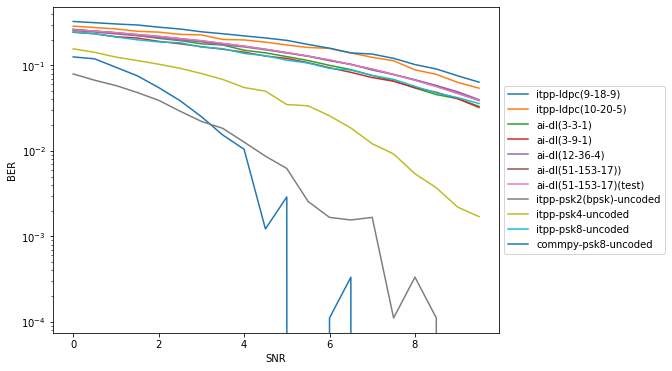

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,ber_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_ldpc_10_20_itpp_psk_16,'', label="itpp-ldpc(10-20-5)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor1,'', label="ai-dl(3-3-1)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor2,'', label="ai-dl(3-9-1)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor4,'', label="ai-dl(12-36-4)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor6,'', label="ai-dl(51-153-17))") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor7,'', label="ai-dl(51-153-17)(test)") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_2_BER_theory[0:20],'', label="psk2-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_4_BER_theory[0:20],'', label="psk4-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_8_BER_theory[0:20],'', label="psk8-theory") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_xlabel('SNR')
#ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

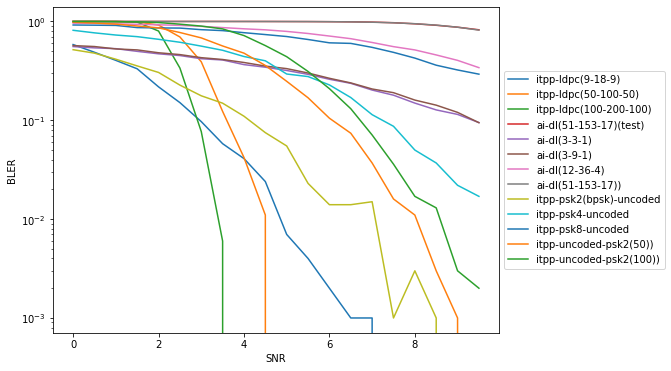

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,bler_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_ldpc_50_100_itpp_psk_4,'', label="itpp-ldpc(50-100-50)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_ldpc_100_200_itpp_psk_4[5:25],'', label="itpp-ldpc(100-200-100)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor7,'', label="ai-dl(51-153-17)(test)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor1,'', label="ai-dl(3-3-1)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor2,'', label="ai-dl(3-9-1)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor4,'', label="ai-dl(12-36-4)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor6,'', label="ai-dl(51-153-17))") # plot BER vs SNR

#ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_50_itpp_psk_2,'', label="itpp-uncoded-psk2(50))") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_100_itpp_psk_2,'', label="itpp-uncoded-psk2(100))") # plot BER vs SNR
ax1.set_ylabel('BLER')
ax1.set_xlabel('SNR')
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

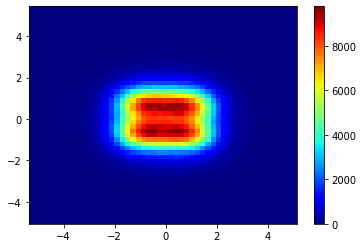

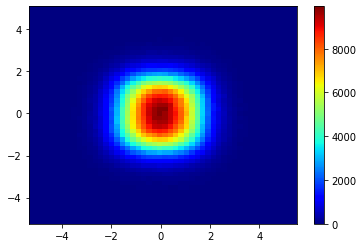

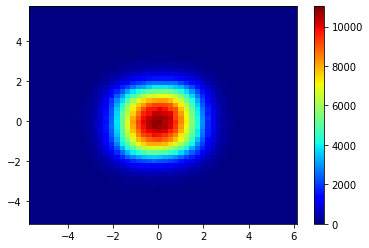

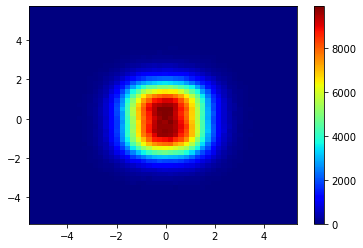

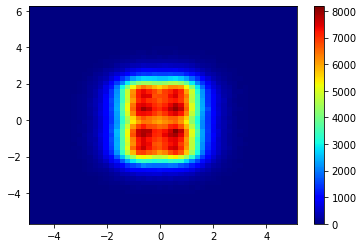

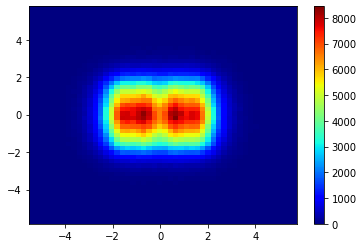

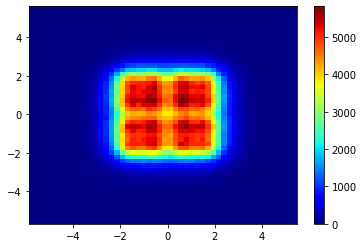

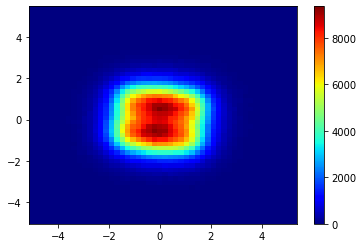

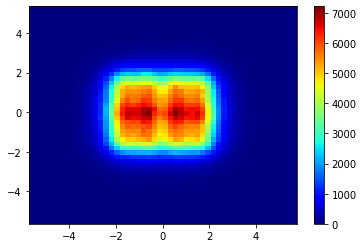

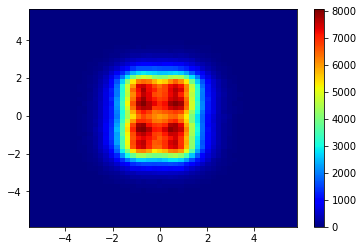

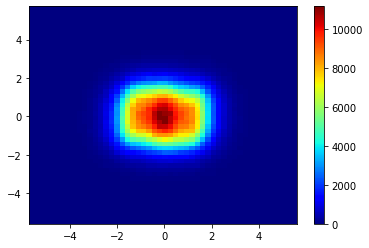

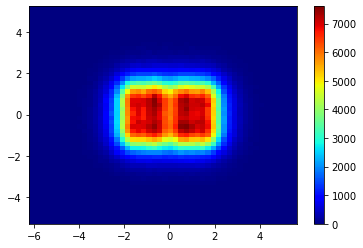

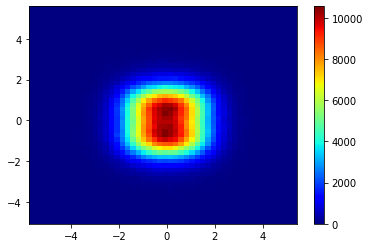

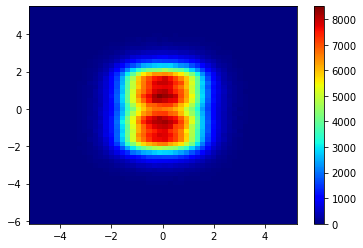

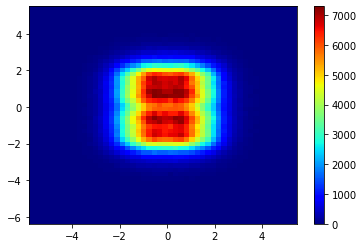

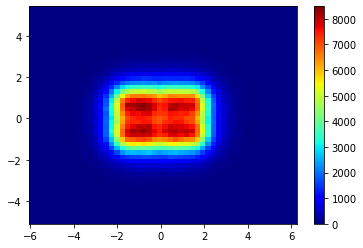

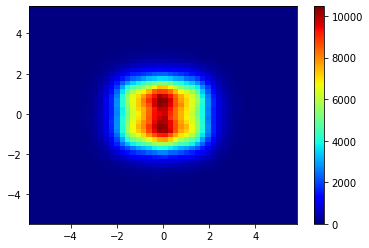

In [ ]:
channel_out_array = numpy.transpose(channel_out6)

for i in range (int(channel_size)):
  plt.hist2d(channel_out_array[2*i], channel_out_array[2*i+1], (50, 50), cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

In [ ]:

from keras import backend as K

input_message_length = 102
encoder_output_length = 306
channel_size = 34

snr_std = -100

def my_loss(y_true, y_pred):
  #tf.reduce_mean (-1 * (y_true*tf.log(y_pred) + (1 - y_true)*tf.log(1 - y_pred) ))
  tf.reduce_mean ((tf.reduce_sum(tf.square(y_true-y_pred), axis=1)))

def custom_loss_function(y_true, y_pred):
   squared_difference = tf.square(y_true - y_pred)
   return tf.reduce_mean(squared_difference, axis=-1)

def _loss_tensor(y_true, y_pred):
    print (y_true)
    #y_true_x = tf.cast(y_true, dtype=tf.float32)
    #y_pred_x = tf.cast(y_pred, dtype=tf.float32)
    #out = -(y_true_x * K.log(y_pred_x) + (1.0 - y_true_x) * K.log(1.0 - y_pred_x))
    out = -(y_true * K.log(y_pred) + (1.0 - y_true) * K.log(1.0 - y_pred))
    return K.mean(out, axis=-1)

input_message_x = Input(shape=(input_message_length,))
# "encoded" is the encoded representation of the input
enc_layer1 = Dense(encoder_output_length, activation='tanh')(input_message_x)
enc_layer11 = Dense(2*channel_size, activation='tanh')(enc_layer1)
enc_layer2 =  enc_layer11 / tf.sqrt(tf.reduce_mean(tf.square(enc_layer11)))
encoder = Model(input_message_x, enc_layer2)

awgn_channel = GaussianNoise(Snr2Sigma(snr_std),input_shape=(2*channel_size,))

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(2*channel_size,))
dec_layer1 = Dense(encoder_output_length, activation='tanh')(encoded_input)
dec_layer2 = Dense(input_message_length, activation='sigmoid')(dec_layer1)
# this model maps an encoded input to its decoder representation
decoder = Model(encoded_input, dec_layer2)

# this model maps an input to its reconstruction
autoencoder = Model(input_message_x, decoder(awgn_channel(encoder(input_message_x))))

#decoder_output = (tf.nn.sigmoid(decoder_input_x))

print("encoder.summary")
print(encoder.summary())
print ("")
print("decoder.summary")
print(decoder.summary())
print ("")
print("autoencoder.summary")
print(autoencoder.summary())
print ("")

encoder.summary
Model: "model_123"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 102)]        0                                            
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 306)          31518       input_15[0][0]                   
__________________________________________________________________________________________________
dense_29 (Dense)                (None, 68)           20876       dense_28[0][0]                   
__________________________________________________________________________________________________
tf.math.square_7 (TFOpLambda)   (None, 68)           0           dense_29[0][0]                   
__________________________________________________________________________

In [ ]:
training_input_message = numpy.random.randint(2, size=(NUM_OF_INPUT_MESSAGE_100,input_message_length))
test_input_message = numpy.random.randint(2, size=(NUM_OF_INPUT_MESSAGE_100,input_message_length))


In [ ]:

#def custom_losff_fucntion (act, pred):
#  return (tf.reduce_mean(-1*(act * tf.log(pred) + (1-act)*tf.log(1-pred))))

opt = keras.optimizers.Adam(learning_rate=0.001)
autoencoder.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
#autoencoder.compile(optimizer=opt, loss=custom_losff_fucntion)
#loss='mean_squared_error'
#for snr in (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)):
training_history5 = dict ()
for snr in (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)):
  sigma = 1.0*Snr2Sigma (snr)
  snr_std = sigma
  print ("Training for SNR=", snr, " sigma=", sigma) 
  awgn_channel = GaussianNoise(sigma,input_shape=(channel_size,))
  autoencoder = Model(input_message_x, decoder(awgn_channel(encoder(input_message_x))))
  #opt = keras.optimizers.Adam(learning_rate=0.003)
  #autoencoder.compile(optimizer=opt, loss=[tf.keras.losses.sparse_categorical_crossentropy],metrics=['accuracy'])
  autoencoder.compile(optimizer=opt, loss='mse',metrics=['accuracy'])
  history = autoencoder.fit(training_input_message, training_input_message,
                #epochs=50, original
                epochs=40,
                batch_size=5000,
                shuffle=False,
                validation_data=(test_input_message, test_input_message))
  training_history5 [snr] = history

Training for SNR= 0.0  sigma= 1.0
Epoch 1/40
40/40 [==============================] - 5s 123ms/step - loss: 0.2380 - accuracy: 0.0154 - val_loss: 0.1521 - val_accuracy: 0.0200
Epoch 2/40
40/40 [==============================] - 5s 121ms/step - loss: 0.1793 - accuracy: 0.0170 - val_loss: 0.1166 - val_accuracy: 0.0149
Epoch 3/40
40/40 [==============================] - 5s 121ms/step - loss: 0.1685 - accuracy: 0.0177 - val_loss: 0.1034 - val_accuracy: 0.0221
Epoch 4/40
40/40 [==============================] - 5s 121ms/step - loss: 0.1660 - accuracy: 0.0217 - val_loss: 0.0990 - val_accuracy: 0.0195
Epoch 5/40
40/40 [==============================] - 5s 122ms/step - loss: 0.1655 - accuracy: 0.0222 - val_loss: 0.0973 - val_accuracy: 0.0246
Epoch 6/40
40/40 [==============================] - 5s 121ms/step - loss: 0.1651 - accuracy: 0.0238 - val_loss: 0.0966 - val_accuracy: 0.0213
Epoch 7/40
40/40 [==============================] - 5s 121ms/step - loss: 0.1649 - accuracy: 0.0240 - val_loss: 0.

In [84]:
snrs_list = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
ber_per_iter_dl_tensor8, bler_per_iter_dl_tensor8, channel_out8 = get_ber_bler_of_model(snrs_list, encoder, decoder, training_input_message, training_input_message.shape[0],input_message_length, channel_size)

SNR: 0.000:-> BLER: 1.000 BER: 0.264
SNR: 0.500:-> BLER: 1.000 BER: 0.253
SNR: 1.000:-> BLER: 1.000 BER: 0.243
SNR: 1.500:-> BLER: 1.000 BER: 0.231
SNR: 2.000:-> BLER: 1.000 BER: 0.220
SNR: 2.500:-> BLER: 1.000 BER: 0.208
SNR: 3.000:-> BLER: 1.000 BER: 0.196
SNR: 3.500:-> BLER: 1.000 BER: 0.184
SNR: 4.000:-> BLER: 1.000 BER: 0.171
SNR: 4.500:-> BLER: 1.000 BER: 0.159
SNR: 5.000:-> BLER: 1.000 BER: 0.147
SNR: 5.500:-> BLER: 1.000 BER: 0.135
SNR: 6.000:-> BLER: 1.000 BER: 0.123
SNR: 6.500:-> BLER: 1.000 BER: 0.112
SNR: 7.000:-> BLER: 1.000 BER: 0.101
SNR: 7.500:-> BLER: 1.000 BER: 0.091
SNR: 8.000:-> BLER: 1.000 BER: 0.081
SNR: 8.500:-> BLER: 0.999 BER: 0.073
SNR: 9.000:-> BLER: 0.998 BER: 0.064
SNR: 9.500:-> BLER: 0.997 BER: 0.057


In [85]:
test_input_message = numpy.random.randint(2, size=(NUM_OF_INPUT_MESSAGE,input_message_length))
ber_per_iter_dl_tensor9, bler_per_iter_dl_tensor9, channel_out9 = get_ber_bler_of_model(snrs_list, encoder, decoder, test_input_message, test_input_message.shape[0],input_message_length, channel_size)

SNR: 0.000:-> BLER: 1.000 BER: 0.265
SNR: 0.500:-> BLER: 1.000 BER: 0.254
SNR: 1.000:-> BLER: 1.000 BER: 0.242
SNR: 1.500:-> BLER: 1.000 BER: 0.232
SNR: 2.000:-> BLER: 1.000 BER: 0.221
SNR: 2.500:-> BLER: 1.000 BER: 0.209
SNR: 3.000:-> BLER: 1.000 BER: 0.196
SNR: 3.500:-> BLER: 1.000 BER: 0.185
SNR: 4.000:-> BLER: 1.000 BER: 0.172
SNR: 4.500:-> BLER: 1.000 BER: 0.160
SNR: 5.000:-> BLER: 1.000 BER: 0.148
SNR: 5.500:-> BLER: 1.000 BER: 0.136
SNR: 6.000:-> BLER: 1.000 BER: 0.124
SNR: 6.500:-> BLER: 1.000 BER: 0.112
SNR: 7.000:-> BLER: 1.000 BER: 0.102
SNR: 7.500:-> BLER: 1.000 BER: 0.092
SNR: 8.000:-> BLER: 1.000 BER: 0.082
SNR: 8.500:-> BLER: 0.999 BER: 0.074
SNR: 9.000:-> BLER: 0.998 BER: 0.066
SNR: 9.500:-> BLER: 0.997 BER: 0.058


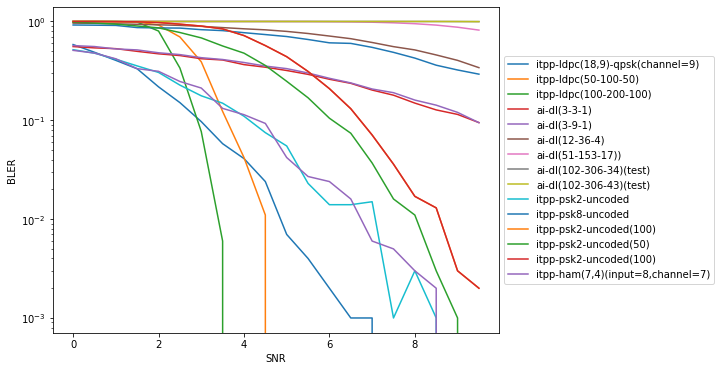

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,bler_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(18,9)-qpsk(channel=9)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_ldpc_50_100_itpp_psk_4,'', label="itpp-ldpc(50-100-50)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_ldpc_100_200_itpp_psk_4[5:25],'', label="itpp-ldpc(100-200-100)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor1,'', label="ai-dl(3-3-1)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor2,'', label="ai-dl(3-9-1)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor4,'', label="ai-dl(12-36-4)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor6,'', label="ai-dl(51-153-17))") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor8,'', label="ai-dl(102-306-34)(test)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor9,'', label="ai-dl(102-306-43)(test)") # plot BER vs SNR
#ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_100_itpp_psk_2,'', label="itpp-psk2-uncoded(100)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_50_itpp_psk_2,'', label="itpp-psk2-uncoded(50)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_100_itpp_psk_2,'', label="itpp-psk2-uncoded(100)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.set_ylabel('BLER')
ax1.set_xlabel('SNR')
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

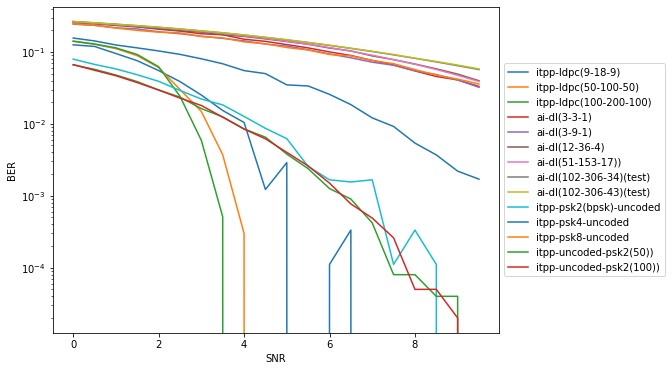

In [87]:

import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,ber_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_ldpc_50_100_itpp_psk_4[5:25],'', label="itpp-ldpc(50-100-50)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_ldpc_100_200_itpp_psk_4[5:25],'', label="itpp-ldpc(100-200-100)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor1,'', label="ai-dl(3-3-1)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor2,'', label="ai-dl(3-9-1)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor4,'', label="ai-dl(12-36-4)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor6,'', label="ai-dl(51-153-17))") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor8,'', label="ai-dl(102-306-34)(test)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor9,'', label="ai-dl(102-306-43)(test)") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_50_itpp_psk_2[5:25],'', label="itpp-uncoded-psk2(50))") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_100_itpp_psk_2[5:25],'', label="itpp-uncoded-psk2(100))") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_xlabel('SNR')
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()